# Metrics for comparing prediction error in classification and regression models

## Part 1: Classification Metrics: 

## Accuracy

In [1]:
# Metrics module allows you define particular metrics

# Accuracy

import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 1, 1]
y_true = [1, 1, 1, 0] # note that we are comparing predictions from a model to some ytest values

print(accuracy_score(y_true, y_pred)) # proportion of ytest predicted correctly


print(accuracy_score(y_true, y_pred, normalize=False))



0.5
2


### Parameter of interest:

normalize : default=True

    If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.

## Confusion matrix

In [2]:
#The confusion_matrix function can also evaluate classification accuracy by computing the confusion matrix.

# It's simply a tabulation of predicted y on test y.

from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

mat = confusion_matrix(y_true, y_pred)

print(mat)



[[2 0]
 [1 3]]


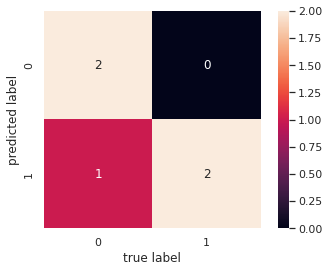

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(mat, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In the above we see true positives or TP =  3, false positives or  FP = 1, true negatives or TN = 2, 
and false negatives or FN = 0.  

Accuracy = TP + TN / TP + TN +FP +FN

Sometimes measuring accuracy alone can give use to much confidence in our predictive models.  If we have misbalanced data such that 1000 values are labeled one to 5 labeled zero, then a simple prediction of all ones could give us unreasonably high confidence in the success of our model.

In predictive analytic classification models we tend to use the f1 score or the ROC area under the curve instead.

These metrics account for imbalanced data better because they measure each of the above classification categories against each other in ways that take imbalanced data into account.



In [ ]:
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 0, 1, 3)

## Using the classification report to understand predictive success

In [3]:
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp


(2, 0, 1, 2)

In [4]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



83.5

Defining precision:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

i.e.-precision gives us information about its performance with respect to false positives.  If we want to minimize false positives then we want precision to be 1.


Defining recall:

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

i.e.-if we want to focus more on minimizing False Negatives, we would want our Recall to be closer to 1.

Defining the f1 score:

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall) 

if both prec. and rec are high, then f1 is high.  BUT
if one or both are low, then f1 reacts to the signal and it drops a lot.
                                                      

## The ROC Area under the Curve

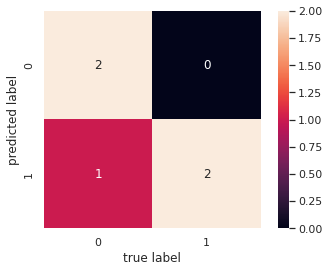

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
y_true = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
accuracy_score(y_true, y_pred)

0.8

In [10]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_true, y_pred))

0.8333333333333333


## What is the logic for the ROC area under the curve?

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/800px-ROC_space-2.png "AUC")


It is a plot of the True Positive Rate (on the y-axis) versus the False Positive Rate (on the x-axis) for every possible classification threshold.  

TPR=TP/(TP+FN)

FPR=FP/(FP+TN)

We treat the FPR as X and TPR as Y to plot points at a large range of threshold points on the x axis.  (i.e. We usually define success for y at a cut point of .5.  Here we do it for a large range of cut points. Then we plot points for each X,Y TPR and FPR value.

The area under the curve is calculated using calculus.  We find a value from .5 to 1, with 1 meaning perfect prediction.  

Why should we use AUC instead of Accuracy?

It accounts for imbalanced data by testing against many threshold definitions!

## Defining your scoring strategy from metric functions

Some scoring metrics are built in to cross_val_score and gridsearchCV.

Others require you to build them first before they can be used.

In [ ]:
from sklearn.metrics import log_loss, make_scorer

log_loss_scorer = make_scorer(log_loss)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(), param_grid={'C': [1, 10]}, scoring=log_loss_scorer )

#or use pre-loaded scorers using string input for scoring argument:
grid = GridSearchCV(LogisticRegression(), param_grid={'C': [1, 10]}, scoring="f1_score")



# Part 2: Regression metrics

Note: some of these values are made negative in sklearn to keep computation consistant.  You will see negative MSE rather than MSE.  Why?  Coders behind sklearn want to stick to one rule: Greater is better.  So they try to make metrics follow this rule.  Greater negative MSE, for example, means better prediction.

Mean squared error:

(yi-yhat)^2 /(number of observations)

Corrects RSS for number of observations


In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

Root mean squared error:

Take the square root of the above.

A bit more robust to outliers than MSE

Mean absolute error:
    
    Similar to above, but take absolute value instead of squaring difference between yi and yhat

In [ ]:

from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

Median absolute error:

Median of...   
|yi-yhat|
   
   Find median of absolute difference between y and yhat
   
   Also robust to outliers in data.


In [ ]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

R-square:

1-(RSS/TSS)


In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred) 

0.9486081370449679

## Can you evaluate the boston dataset using new regression metrics?
How about the breast cancer dataset?